In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 1.2 Causal Effects and Idealized Experiments

## Estimation of Causal Effects 

One way to measure a causal effect is to conduct an experiment. ... This is an example of a randomized controlled experiment. It is controlled in the sense that there are both a control group that receives no treatment (no fertilizer) and a treatment group that receives the treatment. 

It is randomized in the sense that the treatment is assigned randomly. This random assignment eliminates (or minimizes) the possibility of a systematic relationship between for example, how sunny the plot is and whether it receives fertilizer so that the only systematic difference between the treatment and control groups is the treatment. 

In [2]:
control_group = np.random.normal(10,40,100)
treatment_group = np.random.normal(10,40,100)

In [3]:
treatment_group_at = treatment_group + 100

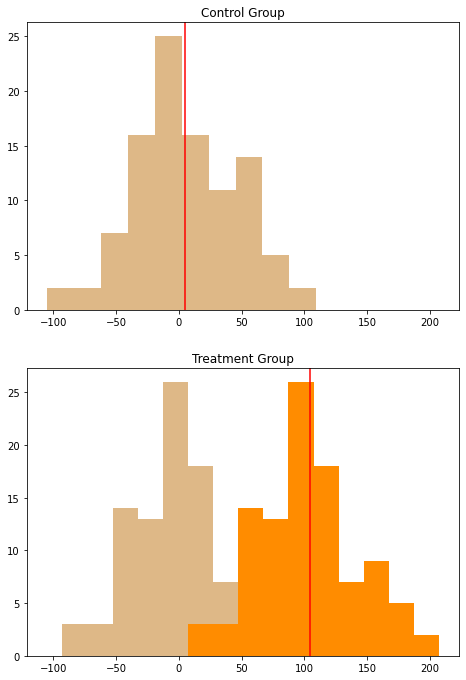

In [4]:
fig = plt.figure()

ax_1 = fig.add_axes([0,2,1,1])
ax_1.hist(control_group, bins=10, color='burlywood')
ax_1.axvline(np.mean(control_group), color='red')
ax_1.set_title('Control Group')



ax_2 = fig.add_axes([0,0.8,1,1], sharex = ax_1)
ax_2.hist(treatment_group, bins=10, color='burlywood')
ax_2.hist(treatment_group_at, bins=10, color='darkorange')
ax_2.axvline(np.mean(treatment_group_at), color='red')
ax_2.set_title('Treatment Group')


plt.show()

In [5]:
len(control_group)

100

In [6]:
df_control = pd.DataFrame({"y":control_group, "x":0})

In [7]:
df_treatment = pd.DataFrame({"y":treatment_group_at, "x":1})

In [8]:
df = pd.concat([df_control, df_treatment])

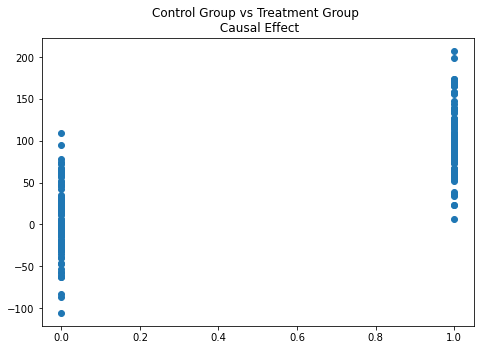

In [9]:
fig = plt.figure()

ax_1 = fig.add_axes([0,0,1,1])
ax_1.scatter('x','y', data=df)
#ax_1.axvline(np.mean(control_group), color='red')
ax_1.set_title('Control Group vs Treatment Group \n Causal Effect')


plt.show()

#### Importance of randomization

We are comparing the control group and the treatment group. 

But say one or the both was not randomized. For example, the control group was not randomized. Then the mean of it would be formed around say 50. Then the true causal effect would not be biased. 

# 1.3 Data: Sources and Types

In econometrics, data come from one of two sources: experiments or nonexperimental observations of the world. 


## Experimental vs. Observational Data

**Experimental data** come from experiments designed to evaluate a treatment or policy or to investigate a causal effect. 

ex) Chapter 13, thousands of students were randomly assigned to classes of different sizes for several years and were given annual standardized tests. 

Because real-world experiments with human subjects are difficult to administer and to control, they have flaws relative to ideal randomized controlled experiments. **(so it means, it still has a problem with perfectly randomizing).**

Data obtained by observing actual behavior outside an experimental setting are called **observational data.** Observational data are collected using surveys, such as a telephone survey of consumers, and administrative records, such as historical records on mortgage applications maintained by lending institutions. 

Observational data pose major challenges to econometrics attempts to estimate causal effects, and the tools of econometrics to tackle these challenges. In the real world, levels of "treatment" are not assigned at random, so it is difficult to sort out the effect of the "treatment" from other relevant factors. Much of econometircs is devoted to methods for meeting the challenges encountered when real-world data are used to estimate causal effects. 


## Three Types (cross sectional vs time series vs panel)

Whether the data are experimental or observational, data sets come in three main types: **cross-sectional data, time series data, and panel data.** 

### Cross-Sectional Data

Data on different entities for a single time period are called cross-sectional data. 


### Time Series Data

Time series data are data for a single entity collected at multiple time periods. 


### Panel Data 

Panel data are data for multiple entities in which each entity is observed at two or more periods. 

# Chapter 8: Nonlinear Regression Function 

In [10]:
df = pd.read_csv('CASchools.csv')

In [11]:
df["score"] = (df["read"] + df["math"]) / 2 

df['stratio'] = df['students'] / df['teachers']

In [12]:
df.head()

,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,score,stratio
0,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,690.799988,17.889909
1,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,661.200012,21.524664
2,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,643.600006,18.697225
3,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,647.700012,17.357143
4,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,640.850006,18.671329


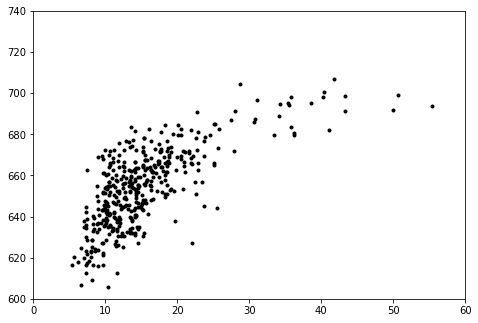

In [13]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.scatter('income', 'score', data=df, color='black', marker='.')
ax.set_ylim(600, 740)
ax.set_xlim(0, 60)


plt.show()

It seems that the relationship between district income and test scores is not a straight line. Rather, it is nonlinear. A nonlinear function is a function with a slope that is not constant: The function f(x) is lienar if the slope of f(x) is the same for all values of x, but if the slope depends on the value of x, then f(x) is nonlienar. 

One ways to approximate such a curve mathematically is to model the relationship as a quadratic function. That is, we could model test scores as a function of income and the square of income. 

**Qudratic regression model**

$TestScore_i = \beta_0 + \beta_1Income_i + \beta_2Income^2_i + u_i$

You will see that it is a version of the multiple regression model with two regressors: The first regressors is $Income$, and the second regressor is $Income^2$.

Mechanically, you can create this second regressor by generating a new variable that equals the square of Income. 

Thus, after defining the regressors as $Income$ and $Income^2$, the nonlinear model in the Equation is simply a multiple regression model with two regressors. 

Because the quadratic regression model is a variant of multiple regression, its unknown population coefficients can be estimated and tested using the OLS methods. 

We can go one step beyond this visual comparison and formally test the hypothesis that the relationship between income and test scores is linear against the alternative that it is nonlinear. 

If the relationship is linear, then the regression function is correclty specified as Equation (8.1), except that the regressor $Income^2$ is absent; that is, if the relationship is linear, then Equation (8.1) holds with $\beta_2 = 0$. 

Thus we can test the null hypothesis that the population regression is linear against the alternative that is quadratic by testing the null hypothesis that $\beta_2 = 0$ against the alternative that $\beta_2 \neq 0$.

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
x = np.array(df.income).reshape(-1,1)
y = np.array(df.score).reshape(-1,1)

In [16]:
reg  = LinearRegression().fit(x,y)

In [17]:
reg.intercept_

array([625.38358048])

In [18]:
reg.coef_

array([[1.8785494]])

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
results = smf.ols('score ~ income', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     430.8
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.75e-66
Time:                        12:52:57   Log-Likelihood:                -1684.5
No. Observations:                 420   AIC:                             3373.
Df Residuals:                     418   BIC:                             3381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    625.3836      1.532    408.106      0.0

In [21]:
results = smf.ols('score ~ + income + np.square(income)', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     261.3
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.78e-74
Time:                        12:52:57   Log-Likelihood:                -1662.7
No. Observations:                 420   AIC:                             3331.
Df Residuals:                     417   BIC:                             3344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           607.3017      3.04

## The Effect on Y of a Change in X in Nonlinear Specifications

When the population regression function is lienar, this effect is easy to calculate. When the regression function is nonlinear, however, the expected change in Y is more complicated to calculate because it can depend on the values of the independent variables. 



## Interactions Between Independent Variables

We consider three cases; when both independent variables are binary, when on is binary and the other is continuous, and when both are continuous. 

### Interactions Between Two Binary Variables 

#### Application to the student-teacher ratio and the percentage of English learners

Let HiSTR be a binary variable that equals 1 if the student-teacher ratio is 20 or more and equals 0 otherwise, and let HiEL be a binary variable that equals 1 if the percentage of English learners is 10% or more and equals 0 otherwise. 


In [22]:
df["HiSTR"] = np.where(df["stratio"]>=20, 1, 0)
df["HiEL"] = np.where(df["english"]>=10, 1, 0)

In [23]:
results = smf.ols('score ~ HiSTR + HiEL + (HiSTR*HiEL)', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     57.97
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.51e-31
Time:                        12:52:57   Log-Likelihood:                -1760.0
No. Observations:                 420   AIC:                             3528.
Df Residuals:                     416   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.1433      1.316    504.852      0.0

##### Model specification

$Y_i = \beta_0 + \beta_1D_{1i} + \beta_2D_{2i} + \beta_3(D_{1i}*D_{2i}) + u_i$

The predicted effect of moving from a district with a low student-teacher ratio to one with a hight student-teacher ratio, holding constant whether the percentage of English learners is high or low, is given by this: 

$E[Y_i|D_{1i}=1, D_{2i}=d_2] - E[Y_i|D_{1i}=0, D_{2i}=d_2] = \beta_1 + \beta_3d_2$

#### Interaction Plots 

An interaction plot is a line graph that reveals the presence or absence of interactions among independent variables. To create an interaction plot, do the following:

* Show the dependent variable on the vertical axis (i.e., the Y axis); and an independent variable, on the horizontal axis (i.e., the X axis).

* Plot mean scores on the dependent variable separately for each level of a potential interacting variable.

* Connect the mean scores, producing separate lines for each level of the interacting variable

To understand potential interaction effects, compare the lines from the interaction plot:

* If the lines are parallel, there is no interaction.

* If the lines are not parallel, there is an interaction.

References: https://stattrek.com/multiple-regression/interaction.aspx

In [24]:
int_df = df[["score", "HiSTR", "HiEL"]].groupby(["HiEL","HiSTR"]).mean()

In [25]:
int_df.query("HiEL==0")["score"]

HiEL  HiSTR
0     0        664.143286
      1        662.235444
Name: score, dtype: float64

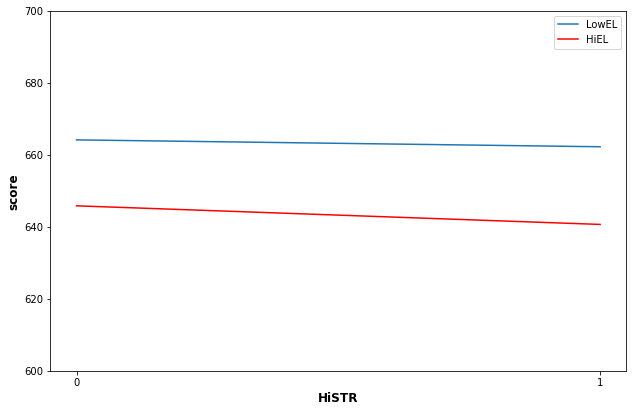

In [26]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig = plt.figure(figsize=(8,5))

ax = fig.add_axes([0,0,1,1])

ax.plot((0,1), int_df.query("HiEL==0")["score"], label="LowEL")
ax.plot((0,1), int_df.query("HiEL==1")["score"], color="red", label="HiEL")
ax.set_xlabel('HiSTR', fontsize="large", fontweight='bold')
ax.set_ylabel('score', fontsize="large", fontweight='bold')
ax.set_ylim(600, 700)

ax.xaxis.set_major_locator(MultipleLocator(1))


ax.legend()
plt.show()

Okay, it looks like they don't have a same slope. But it could actually be different from a samplling error. 

To test that, we can't use p-value for each of the regressions. Because that is to test whether the coefficient is zero or not. 

So, we employ a different method. 

## Regression Analysis With Interaction Terms

## Without Interaction Term

In [27]:
results = smf.ols('score ~ HiSTR + HiEL', data=df).fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     86.43
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           3.95e-32
Time:                        12:52:57   Log-Likelihood:                -1760.5
No. Observations:                 420   AIC:                             3527.
Df Residuals:                     417   BIC:                             3539.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.6864      1.201    553.452      0.0

## With Interaction Term

In [28]:
results_2 = smf.ols('score ~ HiSTR + HiEL + (HiSTR*HiEL)', data=df).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     57.97
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.51e-31
Time:                        12:52:57   Log-Likelihood:                -1760.0
No. Observations:                 420   AIC:                             3528.
Df Residuals:                     416   BIC:                             3544.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    664.1433      1.316    504.852      0.0

It looks like the independent variable HiSTR doesn't interact with the independent variable HiEL. Because the p-value for the coefficient of HiSTR increased a lot and also that of the interaction term has high p-value. Therefore these are not significant. 

## Interactions Between a Continuous and a Binary Variable

### Application to the student-teacher ratio and the percentage of English learners. 

Does the effect on test scores of cutting the student-teacher ratio depend on whether the percentage of students still learning English is high or low? 

#### Model Specification 

$\widehat{Y_i} = \beta_0 + \beta_1X_{1i} + \beta_2D_{1i} + \beta_3X_{1i}D_{1i}$

$\widehat{TestScore_i} = \beta_0 + \beta_1STR_{1i} + \beta_2HiEL_{1i} + \beta_3STR_{1i}HiEL_{1i}$

In [29]:
results = smf.ols('score ~ stratio + HiEL + (stratio*HiEL)', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     62.40
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           2.49e-33
Time:                        12:52:57   Log-Likelihood:                -1755.3
No. Observations:                 420   AIC:                             3519.
Df Residuals:                     416   BIC:                             3535.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      682.2458     10.511     64.908   

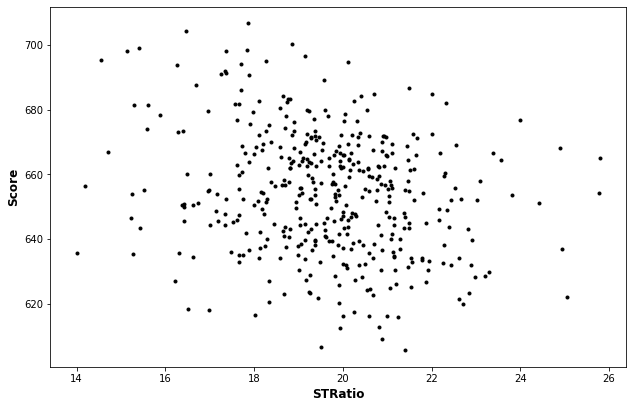

In [30]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])

ax.scatter("stratio", "score", data=df, marker=".", color="black")
ax.set_xlabel("STRatio", fontsize="large", fontweight="bold")
ax.set_ylabel("Score", fontsize="large", fontweight="bold")


plt.show()

In [31]:
results_1 = smf.ols('score ~ stratio', data=df[df["HiEL"]==0]).fit()
results_2 = smf.ols('score ~ stratio', data=df[df["HiEL"]==1]).fit()

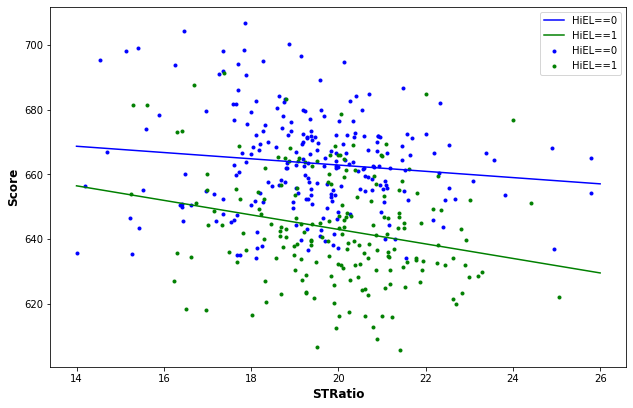

In [32]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1,1])

ax.scatter("stratio", "score", data=df[df["HiEL"]==0], marker=".", color="blue", label="HiEL==0")
ax.scatter("stratio", "score", data=df[df["HiEL"]==1], marker=".", color="green", label="HiEL==1")

x = np.linspace(14,26,1000)
ax.plot(x, results_1.params[0] + results_1.params[1]*x, color="blue", label="HiEL==0")
ax.plot(x, results_2.params[0] + results_2.params[1]*x, color="green", label="HiEL==1")


ax.set_xlabel("STRatio", fontsize="large", fontweight="bold")
ax.set_ylabel("Score", fontsize="large", fontweight="bold")


ax.legend()
plt.show()

## Interactions Between Two Continuous Variables

$\widehat{Y_i} = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \beta_3(X_{1i}X_{2i})$


### Application to the student-teacher ratio and the percentage of English learners

$\widehat{TestScore_i} = \beta_0 + \beta_1STR_{i} + \beta_2PctEL_{i} + \beta_3(STR_{i}PctEL_{i})$


In [33]:
results = smf.ols('score ~ stratio + english + (stratio*english)', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           6.51e-50
Time:                        12:52:58   Log-Likelihood:                -1716.6
No. Observations:                 420   AIC:                             3441.
Df Residuals:                     416   BIC:                             3457.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         686.3385      9.403     

### Okay, I need to study F-Statistic 

## Hypothesis Tests and Confidence Intervals in Multiple Regression

In [ ]:
np.random.multivariate_normal((0,0), )

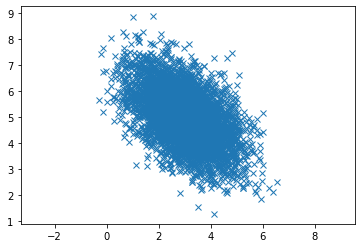

In [93]:
mean = [3, 5]
cov = [[1, -0.5], [-0.5, 1]]  # diagonal covariance

import matplotlib.pyplot as plt
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [36]:
np.random.multivariate_normal(mean, cov, 5000).T

array([[ -1.27160395,   0.0816669 ,   2.11582491, ...,  -1.11561625,
          0.23252486,  -0.12517252],
       [-11.12061243,  -9.01689293,  10.71008091, ...,  -6.81241451,
         -3.1386697 ,   5.51541366]])

In [37]:
np.random.multivariate_normal(mean, cov, 5000)

array([[-2.39125921, 20.05537044],
       [-0.5053139 , -9.9782953 ],
       [-1.45892612, 17.45915186],
       ...,
       [-0.09309669, -3.2232013 ],
       [-0.26260628,  0.63046537],
       [ 0.31648473, 11.31829942]])

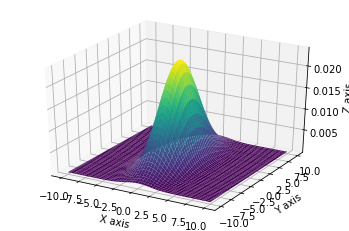

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 10], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()